# Fashion MNIST

There is a nice alternative to the MNIST dataset, the Fashion MNIST dataset. It includes items like shirts, dresses, and shoes as will be shown below.

## Loading Fashion MNIST

Go ahead and load the fashion dataset by running the following cell. Note that "np" is given in the labels indicating that the default keras types are numpy arrays.

In [81]:
# 1. Run the following cell to load the data.
from tensorflow.keras.datasets import fashion_mnist
((X_train_np, y_train_np), (X_test_np, y_test_np)) = fashion_mnist.load_data()

## Reshape Data

To get the data into the same shape as our first MNIST notebook, we need to reshape the data. First check the shape, the reshape it.

In [82]:
# 2. Check shape of X_train_np
X_train_np.shape

(60000, 28, 28)

In [83]:
# 3. Reshape X_train_np from 3D to 2D using the method .reshape(60000, 28*28) on X_train_np
X_train_np = X_train_np.reshape(60000, 28*28)

In [84]:
# 4. Convert to a pandas DataFrame X_train using pd.DataFrame with X_train_np as input
import pandas as pd

X_train = pd.DataFrame(X_train_np)

In [85]:
# 5. Limit X_train to the first 2000 rows (hint you may use .iloc[:2000] on X_train)
X_train = X_train.iloc[:2000]

In [86]:
# 6. Show the first 5 rows of the DataFrame X_train
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


## Graph and Label Fashion Data

In [87]:
# 7. Convert y_train to dataFrame and check y_train.value_counts()
y_train = pd.DataFrame(y_train_np)
y_train = y_train.iloc[:2000]
y_train.value_counts()

1    216
7    215
2    202
9    200
5    200
8    198
3    195
6    194
0    194
4    186
dtype: int64

In [88]:
# 8. We need the class names of the y values. Run the this cell to load them.
class_names = ['tshirt/top', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


In [89]:
# 9. Write code to generate a random integer of y, and print the class name and y value  
# Hint y_train_np may be helpful.
import numpy as np
randomIndex = np.random.randint(0, y_train.shape[0])
randomrow = y_train.iloc[randomIndex, :]
print(randomIndex)
print(randomrow)
print(class_names[randomrow[0]])

1724
0    1
Name: 1724, dtype: uint8
trouser


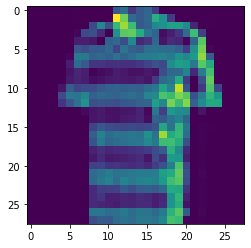

tshirt/top


In [90]:
# 10. Graph a random image and Fashion MNIST classification.
type(randomrow)

randomrow.shape

randomrow

randomIndex = np.random.randint(0, X_train.shape[0])
randomrow = y_train.iloc[randomIndex, :]

randomPixels = X_train.iloc[randomIndex, :]


npRandomRow = np.array(randomPixels)

randomImage = npRandomRow.reshape(28, 28)

import matplotlib.pyplot as plt
plt.imshow(randomImage)

plt.show()

print(class_names[randomrow[0]])

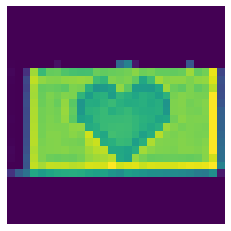

bag


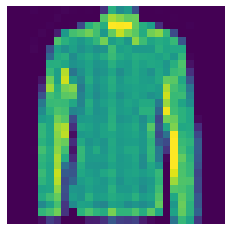

shirt


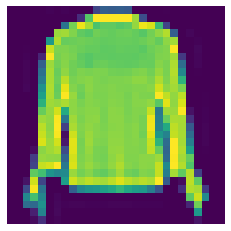

tshirt/top


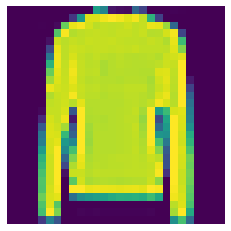

pullover


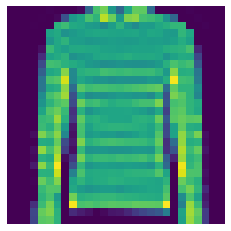

pullover


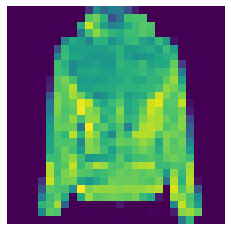

coat


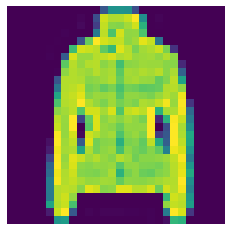

coat


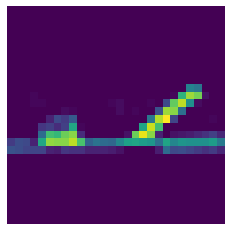

sandal


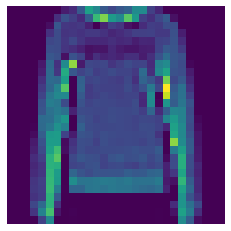

pullover


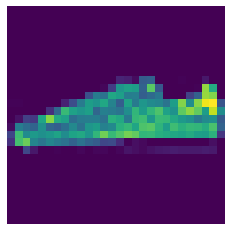

sneaker


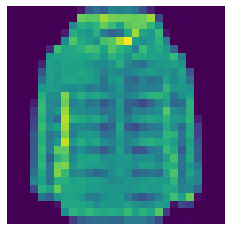

coat


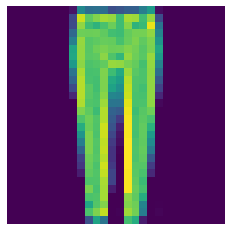

trouser


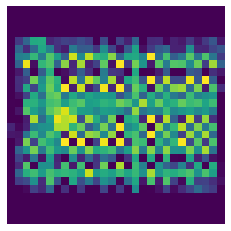

bag


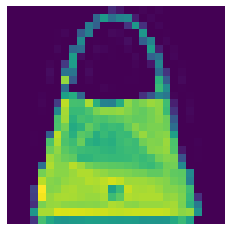

bag


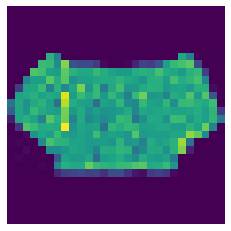

shirt


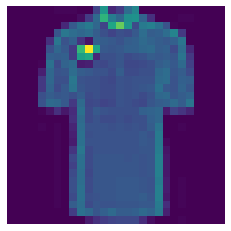

tshirt/top


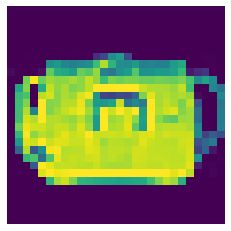

bag


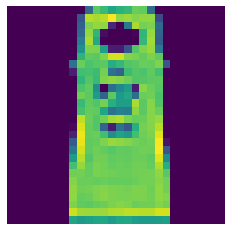

tshirt/top


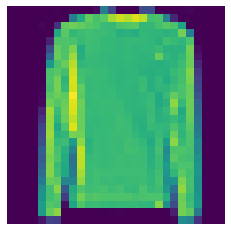

pullover


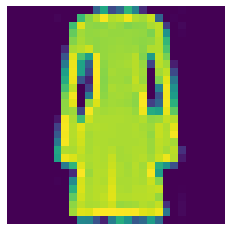

dress


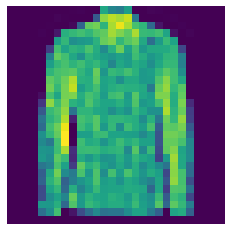

shirt


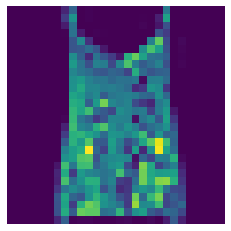

tshirt/top


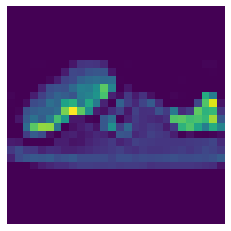

sneaker


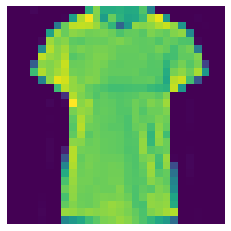

tshirt/top


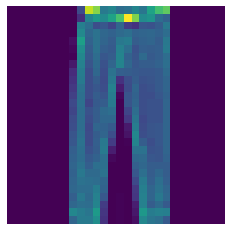

trouser


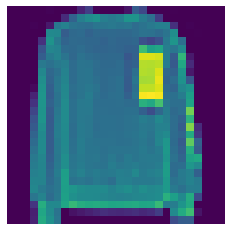

pullover


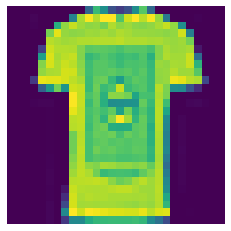

tshirt/top


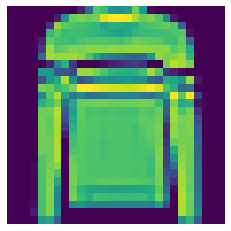

pullover


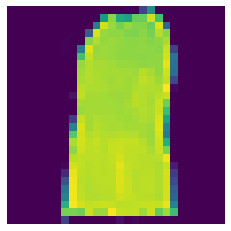

shirt


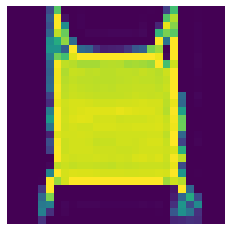

shirt


In [91]:
# 11. Research options to graph multiple images and their classifications at once. 
def im_print():
  randomIndex = np.random.randint(0, X_train.shape[0])
  randomrow = y_train.iloc[randomIndex, :]
# Get the row of the random index
  randomPixels = X_train.iloc[randomIndex, :]


  npRandomRow = np.array(randomPixels)

  randomImage = npRandomRow.reshape(28, 28)

  plt.imshow(randomImage)
  plt.axis("off")
  plt.show()

  print(class_names[randomrow[0]])

for i in range(30):
  im_print()
# Share with your cohort.

## Machine Learning

Score machine learning models with the Fashion MNIST Data using the strategies learned in lecture.

In [92]:
y_test = pd.DataFrame(y_test_np)
X_test_np = X_test_np.reshape(10000, 28*28)
X_test = pd.DataFrame(X_test_np)

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
def classifier(model):
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  testScore = model.score(X_test, y_test)
  print(f"Training:{train_score}")
  print(f"Test:{testScore}")

In [93]:
#Hot Encoding

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


X_test = X_test

In [94]:
X = np.array(X_train)
X_test = np.array(X_test)

#reshape X to (rows)
X = X.reshape(X.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [95]:
print(X.shape)
X_test.shape

(2000, 28, 28, 1)


(10000, 28, 28, 1)

In [98]:
#Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, AveragePooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.constraints import maxnorm

model = Sequential()

#Conv layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1), kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

#Max Pooling layer
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Dropout(0.2))
model.add(AveragePooling2D(3))


#Flatten layer
model.add(Flatten())

model.add(Dense(500))

model.add(Dropout(0.2))

#Output Layer
model.add(Dense(10, activation='softmax'))

print(model.summary())

#Optimizer and early stopping
early_stopping = EarlyStopping(patience=10)

optimizer = Adam(learning_rate=0.001)

#Compile, fit, and eval

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y_train, epochs=1000, batch_size=5, validation_split=0.1,
          callbacks=[early_stopping])
model.evaluate(X_test, y_test)



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_23 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 128)       32896     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 128)      

KeyboardInterrupt: ignored